In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the training and testing dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
#Checking the dimensions of the features and labels for both training and testing set
print("dimension of x_train:", x_train.shape)
print("dimension of y_train:", y_train.shape)
print("dimension of x_test:", x_test.shape)
print("dimension of y_test:", y_test.shape)

dimension of x_train: (25000,)
dimension of y_train: (25000,)
dimension of x_test: (25000,)
dimension of y_test: (25000,)


In [5]:
#Combining both training and testing
data = np.concatenate([x_train, x_test], axis=0)
labels = np.concatenate([y_train, y_test],axis = 0)

In [6]:
#Printing the shapes
print("shape of features:", data.shape)
print("shape of labels:", labels.shape)

shape of features: (50000,)
shape of labels: (50000,)


In [7]:
#Printing the value of one feature
print(data[1])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [8]:
#Printing the label
print(labels[1])

0


In [9]:
#Decoding the feature value to get original sentence
ind = imdb.get_word_index()
rev_ind = dict([(value, key) for (key,value) in ind.items()])

In [10]:
#decoding the sentence at index 0
decoded_list = []
for i in data[0]:
    char = rev_ind.get(i-3, '#')
    decoded_list.append(char)
decoded_sentence = " ".join(wrd for wrd in decoded_list)
print(decoded_sentence)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [11]:
#Printing the categories
print("Categories:", np.unique(labels))

Categories: [0 1]


<Axes: xlabel='labels', ylabel='count'>

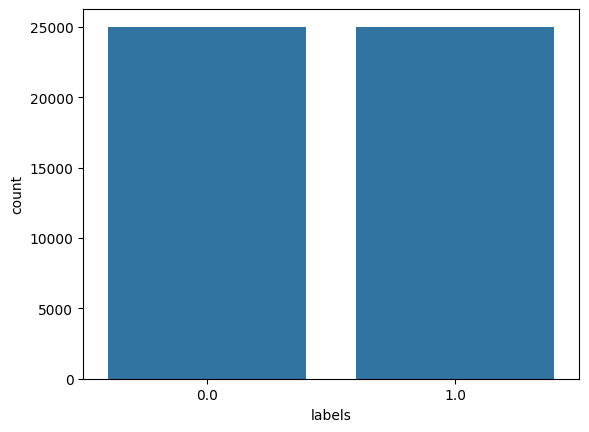

In [12]:
#Checking the distribution of target variable
labels = np.array(labels).astype('float32')
lbl_df = pd.DataFrame({"labels":labels})
sns.countplot(x = 'labels', data = lbl_df)

The labels are equally distributed.

### Vectorizing or sequence adding on the data

In [13]:
def vectorize(seqs, dim=10000):
    vec = np.zeros((len(seqs),dim))
    for i in range(len(seqs)):
        for j in seqs[i]:
            vec[i,j] = 1
    return vec

In [14]:
data_vec = vectorize(data)

In [15]:
#Splitting the data into train and test set
x_train = data_vec[:40000]
x_test = data_vec[40000:]
y_train = labels[:40000]
y_test = labels[40000:]

### Model Building

### Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
#Building and training the model
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [18]:
#Training accuracy
nb.score(x_train,y_train)

0.8618

In [19]:
#Testing accuracy
nb.score(x_test,y_test)

0.848

In [20]:
#Prediction for x_test
y_test_pred = nb.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

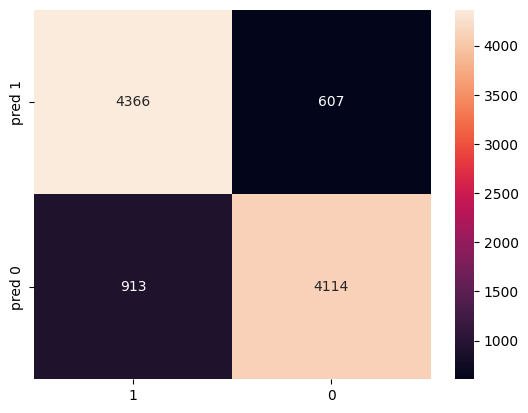

In [22]:
#Plotting the confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['1','0'],index = ['pred 1','pred 0'])
sns.heatmap(cm,fmt='0.04g',annot=True)

In [23]:
#printing Classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      4973
         1.0       0.87      0.82      0.84      5027

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



We can see that, naive bayes model is performing well, we achieve an accuracy of 85% and macro f1 score od 0.85.

Now lets try Neural Network.

### ANN Model

In [27]:
#Building and compiling the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
#Defining the callbcks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
stop = EarlyStopping(patience=15,verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.15, patience=6)

In [29]:
#training the model
history = model.fit(x_train, y_train,batch_size=128,epochs=50, validation_split=0.2,callbacks=[stop,reduce_lr])

Epoch 1/50
250/250 [==============================] - 29s 98ms/step - loss: 0.3264 - accuracy: 0.8583 - val_loss: 0.2834 - val_accuracy: 0.8819 - lr: 0.0010
Epoch 2/50
250/250 [==============================] - 21s 84ms/step - loss: 0.1812 - accuracy: 0.9296 - val_loss: 0.3025 - val_accuracy: 0.8798 - lr: 0.0010
Epoch 3/50
250/250 [==============================] - 21s 82ms/step - loss: 0.0906 - accuracy: 0.9685 - val_loss: 0.3940 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 4/50
250/250 [==============================] - 20s 82ms/step - loss: 0.0460 - accuracy: 0.9834 - val_loss: 0.5172 - val_accuracy: 0.8758 - lr: 0.0010
Epoch 5/50
250/250 [==============================] - 21s 82ms/step - loss: 0.0328 - accuracy: 0.9886 - val_loss: 0.5393 - val_accuracy: 0.8745 - lr: 0.0010
Epoch 6/50
250/250 [==============================] - 22s 87ms/step - loss: 0.0260 - accuracy: 0.9910 - val_loss: 0.5673 - val_accuracy: 0.8758 - lr: 0.0010
Epoch 7/50
250/250 [==============================] - 25s 

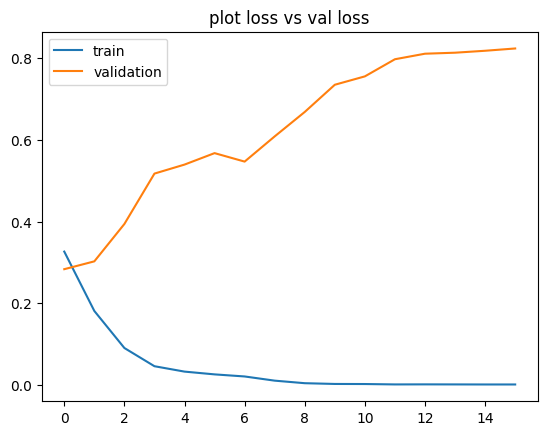

In [30]:
#plot train and val loss
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'])
plt.title("plot loss vs val loss")
plt.legend(("train", "validation"))
plt.show()

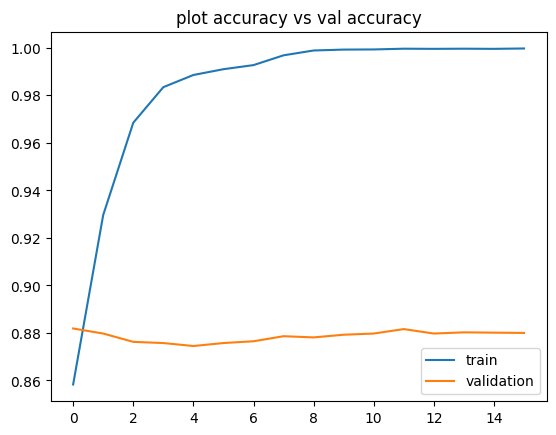

In [31]:
#plot train and val accuracy
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.title("plot accuracy vs val accuracy")
plt.legend(("train", "validation"))
plt.show()

313/313 [==============================] - 3s 9ms/step


<Axes: >

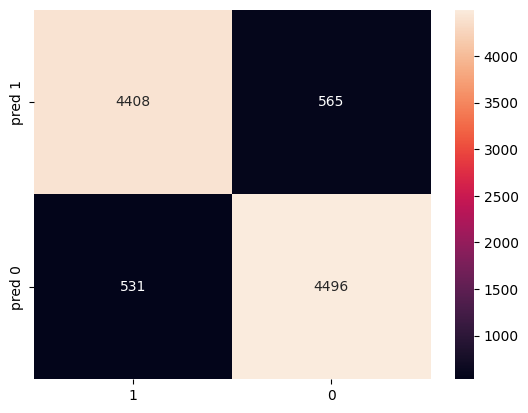

In [35]:
#Plotting the confusion matrix
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
cm = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['1','0'],index = ['pred 1','pred 0'])
sns.heatmap(cm,fmt='0.04g',annot=True)

In [36]:
#Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      4973
         1.0       0.89      0.89      0.89      5027

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



The accracy and macro f1 scorev of the model increased compared to naive bayes model.

In [75]:
# Prediction on test data at index 5
y_pred_5 = model.predict(x_test[5:6])
y_pred_5 = y_pred_5 > 0.5
y_pred_5 = [1 if y_pred_5[0] == True else 0]
y_pred_5

1/1 [==============================] - 0s 63ms/step


[0]

In [76]:
#Save the model
model.save('ann_model.h5')